In [1]:
#### import numpy as np
from scipy.stats import pearsonr

# 生成模拟数据
np.random.seed(0)
n = 10000  # 总样本数
p = 5  # 协变量的维度
m = 500  # 抽样的样本数

# 生成协变量
X = np.random.randn(n, p)

# 生成响应变量
b_true = np.random.randn(p)  # 真实的参数b
a = np.random.normal(scale=2, size=n)  # 随机误差项a
Y = X.dot(b_true) + a  # 响应变量

# 计算每个协变量与参数b的相关性
correlations = [pearsonr(X[:, i], Y)[0] for i in range(p)]

# 根据相关性选择抽样的协变量
selected_indices = np.argsort(np.abs(correlations))[::-1][:m]
X_sampled = X[:, selected_indices]

print("选择的协变量索引：", selected_indices)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

选择的协变量索引： [4 1 2 3 0]


In [2]:
# 计算每个协变量与参数b的相关性
correlations = [pearsonr(X[:, i], Y)[0] for i in range(p)]

# 根据相关性选择抽样的协变量
selected_indices = np.argsort(np.abs(correlations))[::-1][:m]
selected_correlations = [correlations[i] for i in selected_indices]

print("与参数b的相关性：", selected_correlations)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

与参数b的相关性： [-0.5516593455765938, 0.45409465306475616, -0.41704870509750586, -0.17167880924362255, 0.00991353542020286]


In [3]:
# 根据选择的索引抽取协变量
X_sampled = X[:, selected_indices]


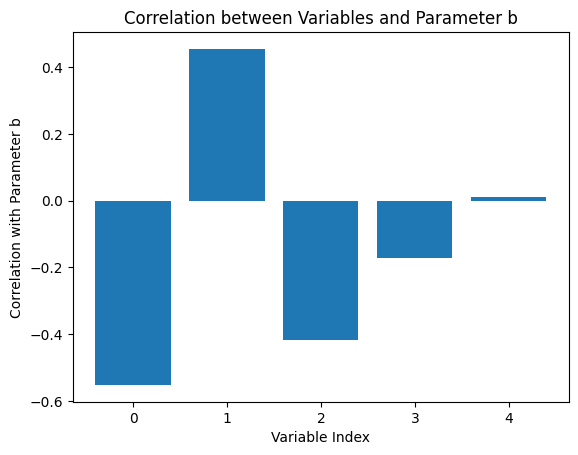

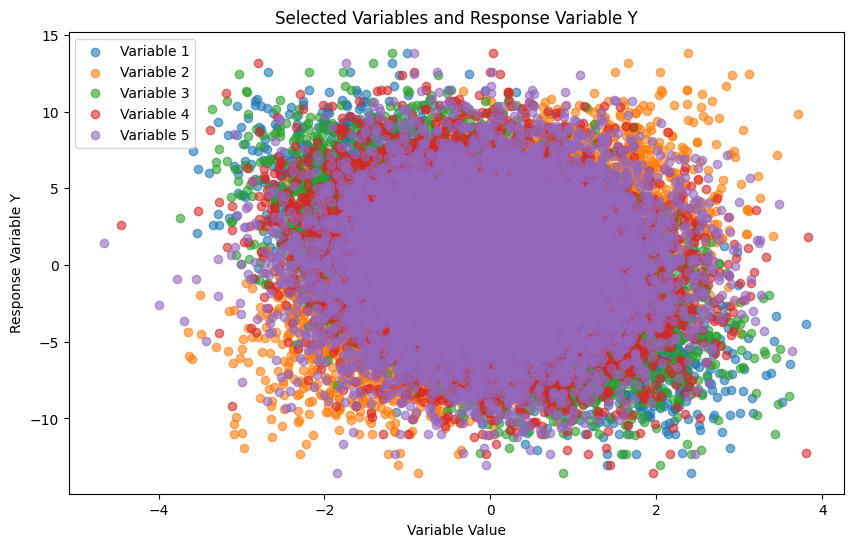

In [4]:
import matplotlib.pyplot as plt

# 可视化协变量与参数b之间的相关性
plt.bar(range(len(selected_correlations)), selected_correlations)
plt.xlabel('Variable Index')
plt.ylabel('Correlation with Parameter b')
plt.title('Correlation between Variables and Parameter b')
plt.show()

# 可视化选择的协变量
plt.figure(figsize=(10, 6))
plt.scatter(X_sampled[:, 0], Y, label='Variable 1', alpha=0.6)
plt.scatter(X_sampled[:, 1], Y, label='Variable 2', alpha=0.6)
plt.scatter(X_sampled[:, 2], Y, label='Variable 3', alpha=0.6)
plt.scatter(X_sampled[:, 3], Y, label='Variable 4', alpha=0.6)
plt.scatter(X_sampled[:, 4], Y, label='Variable 5', alpha=0.6)
plt.xlabel('Variable Value')
plt.ylabel('Response Variable Y')
plt.title('Selected Variables and Response Variable Y')
plt.legend()
plt.show()


In [5]:
# 根据选择的索引抽取协变量
X_sampled = X[:, selected_indices]

# 生成二元分类的响应变量
Y_binary = (Y > np.median(Y)).astype(int)  # 以中位数作为分类阈值

# 使用最大化信息抽样的方法进行建模
logreg_info_sampling = LogisticRegression()
logreg_info_sampling.fit(X_sampled, Y_binary)

# 使用简单随机抽样选择样本
random_indices = np.random.choice(n, m, replace=False)  # 从n个样本中随机选择m个样本，不重复抽样
X_random_sampled = X[random_indices, :]
Y_random_sampled = Y_binary[random_indices]

# 使用简单随机抽样的方法进行建模
logreg_random_sampling = LogisticRegression()
logreg_random_sampling.fit(X_random_sampled, Y_random_sampled)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LogisticRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

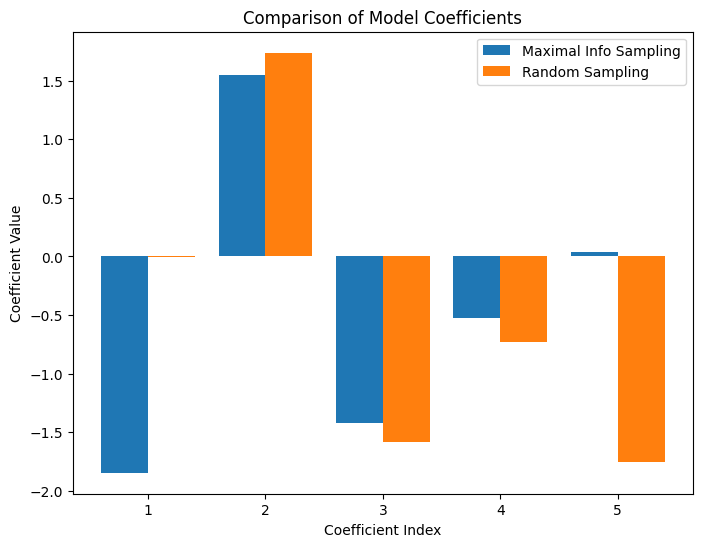

In [6]:
# 提取模型系数
coef_info_sampling = logreg_info_sampling.coef_.flatten()
coef_random_sampling = logreg_random_sampling.coef_.flatten()

# 可视化比较
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(coef_info_sampling))-0.2, coef_info_sampling, width=0.4, label='Maximal Info Sampling', align='center')
plt.bar(np.arange(len(coef_random_sampling))+0.2, coef_random_sampling, width=0.4, label='Random Sampling', align='center')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(np.arange(len(coef_info_sampling)), np.arange(len(coef_info_sampling))+1)
plt.legend()
plt.show()


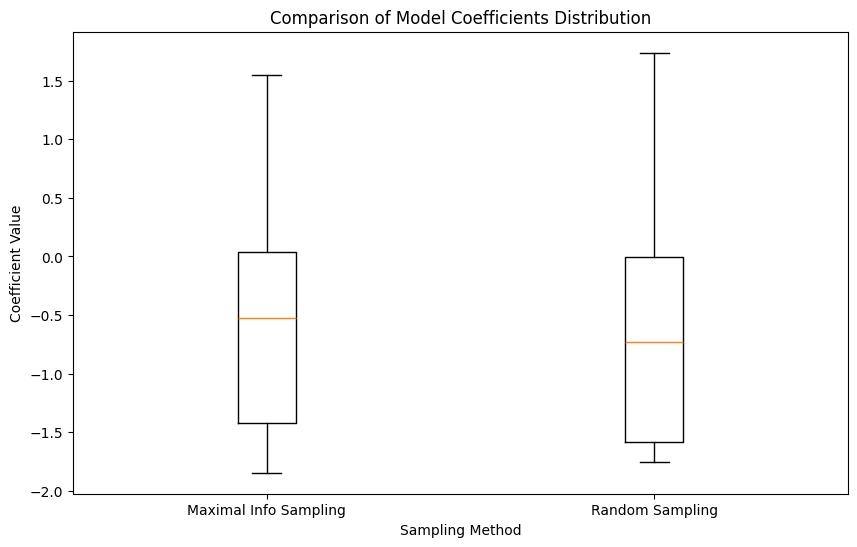

In [7]:
# 将模型系数放入列表中
coef_info_sampling_list = list(coef_info_sampling)
coef_random_sampling_list = list(coef_random_sampling)

# 组合系数列表
coef_combined = [coef_info_sampling_list, coef_random_sampling_list]

# 创建箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(coef_combined, labels=['Maximal Info Sampling', 'Random Sampling'])
plt.xlabel('Sampling Method')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients Distribution')
plt.show()


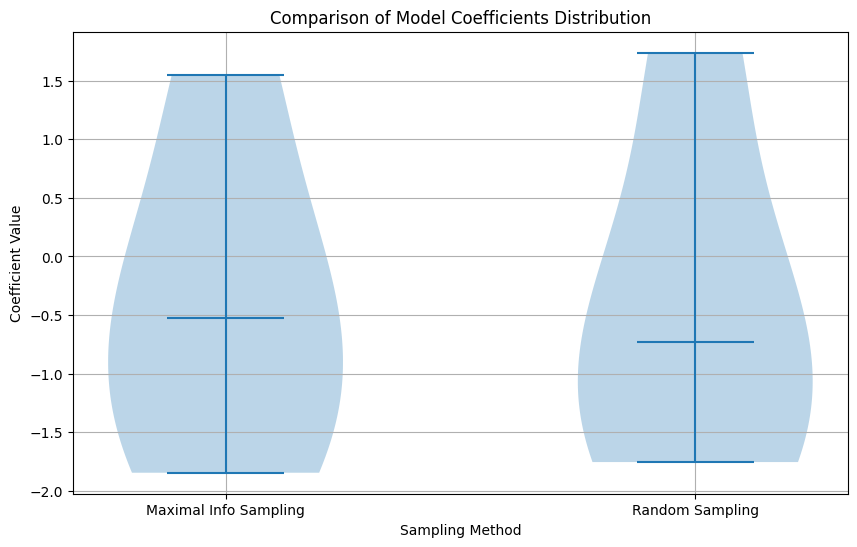

In [8]:
# 创建小提琴图
plt.figure(figsize=(10, 6))
plt.violinplot(coef_combined, showmedians=True)
plt.xticks([1, 2], ['Maximal Info Sampling', 'Random Sampling'])
plt.xlabel('Sampling Method')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients Distribution')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

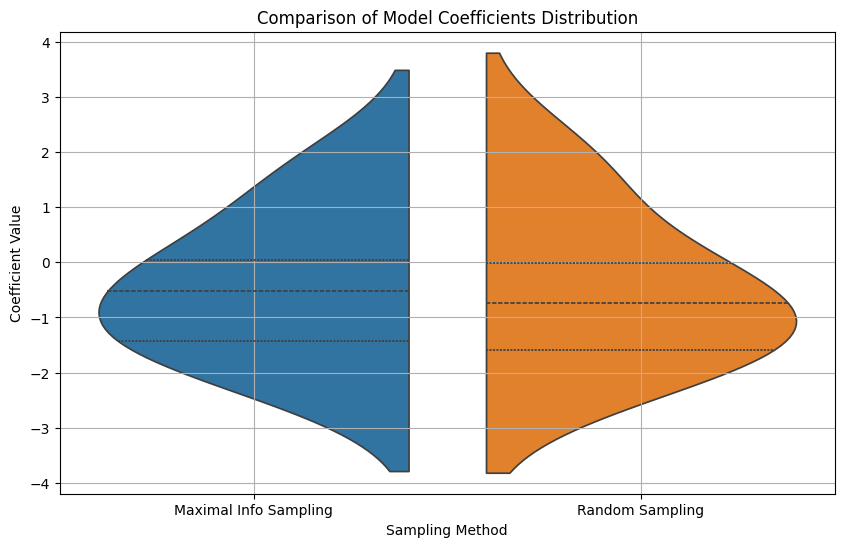

In [9]:
import seaborn as sns

# 将模型系数放入DataFrame中
coef_df = pd.DataFrame({'Coefficient': coef_info_sampling_list + coef_random_sampling_list,
                        'Sampling Method': ['Maximal Info Sampling'] * len(coef_info_sampling_list) + 
                                           ['Random Sampling'] * len(coef_random_sampling_list)})

# 创建核密度估计图
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sampling Method', y='Coefficient', data=coef_df, hue='Sampling Method', split=True, inner='quartile')
plt.xlabel('Sampling Method')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients Distribution')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

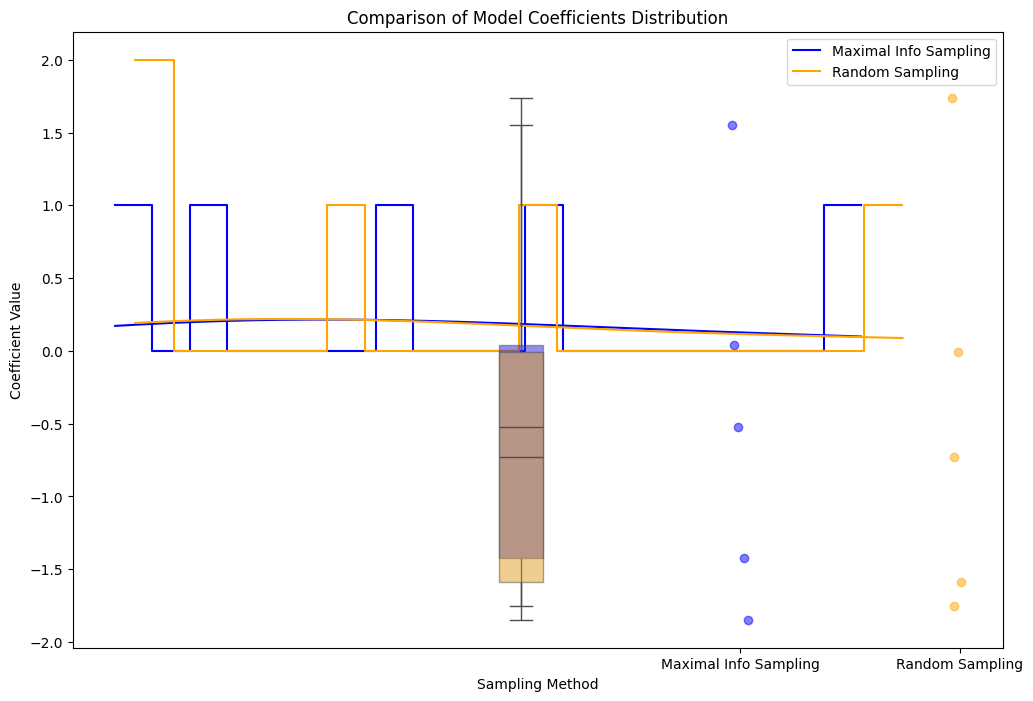

In [10]:
# 创建带有直方图和核密度估计的复合图
plt.figure(figsize=(12, 8))

# 最大化信息抽样方法的直方图和核密度估计
sns.histplot(coef_info_sampling_list, bins=20, kde=True, color='blue', label='Maximal Info Sampling', element='step', fill=False)

# 简单随机抽样方法的直方图和核密度估计
sns.histplot(coef_random_sampling_list, bins=20, kde=True, color='orange', label='Random Sampling', element='step', fill=False)

# 最大化信息抽样方法的盒图
sns.boxplot(y=coef_info_sampling_list, color='blue', width=0.2, boxprops=dict(alpha=0.5))

# 简单随机抽样方法的盒图
sns.boxplot(y=coef_random_sampling_list, color='orange', width=0.2, boxprops=dict(alpha=0.5))

# 最大化信息抽样方法的散点图
x_values_info_sampling = np.random.normal(1, 0.03, size=len(coef_info_sampling_list))
plt.scatter(x_values_info_sampling, coef_info_sampling_list, color='blue', alpha=0.5, label='_nolegend_')

# 简单随机抽样方法的散点图
x_values_random_sampling = np.random.normal(2, 0.03, size=len(coef_random_sampling_list))
plt.scatter(x_values_random_sampling, coef_random_sampling_list, color='orange', alpha=0.5, label='_nolegend_')

plt.xlabel('Sampling Method')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients Distribution')
plt.xticks([1, 2], ['Maximal Info Sampling', 'Random Sampling'])
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

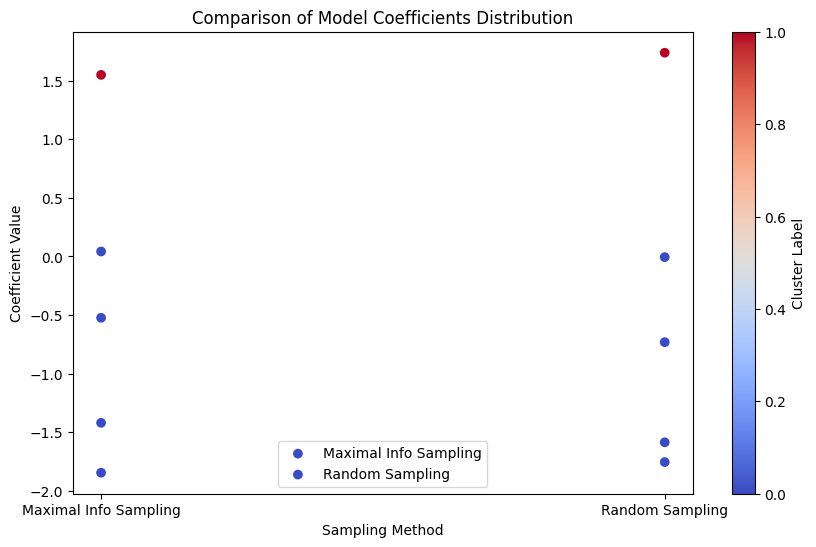

In [11]:
from sklearn.cluster import KMeans

# 将模型系数转换为数组形式
coef_info_sampling_array = np.array(coef_info_sampling_list).reshape(-1, 1)
coef_random_sampling_array = np.array(coef_random_sampling_list).reshape(-1, 1)

# 使用K均值聚类将系数分成两个簇
kmeans_info_sampling = KMeans(n_clusters=2, random_state=0).fit(coef_info_sampling_array)
kmeans_random_sampling = KMeans(n_clusters=2, random_state=0).fit(coef_random_sampling_array)

# 获取聚类的标签
labels_info_sampling = kmeans_info_sampling.labels_
labels_random_sampling = kmeans_random_sampling.labels_

# 绘制点状图
plt.figure(figsize=(10, 6))
plt.scatter(np.repeat(1, len(coef_info_sampling_list)), coef_info_sampling_list, c=labels_info_sampling, cmap='coolwarm', label='Maximal Info Sampling')
plt.scatter(np.repeat(2, len(coef_random_sampling_list)), coef_random_sampling_list, c=labels_random_sampling, cmap='coolwarm', label='Random Sampling')
plt.xlabel('Sampling Method')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients Distribution')
plt.xticks([1, 2], ['Maximal Info Sampling', 'Random Sampling'])
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

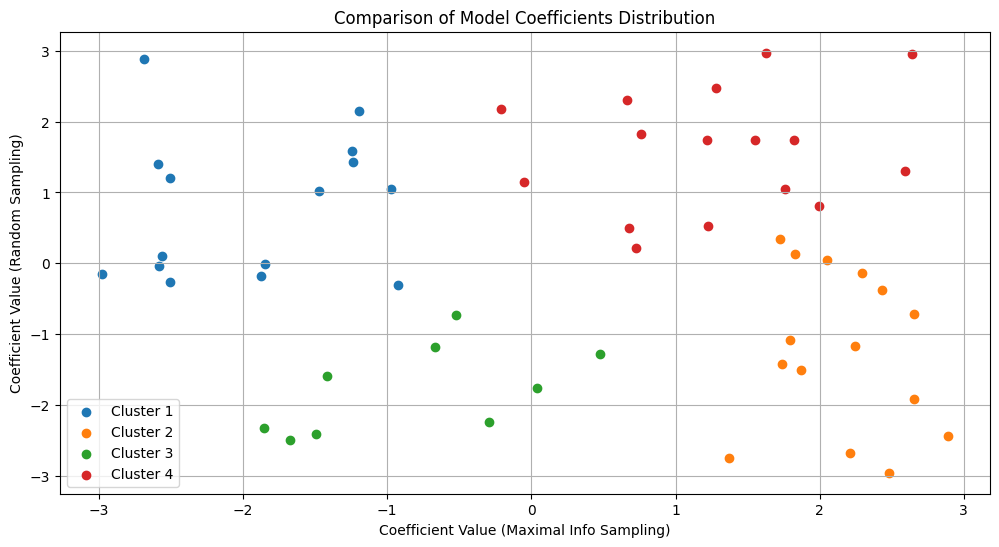

In [12]:
from sklearn.mixture import GaussianMixture

# 生成更丰富的数据
coef_info_sampling_list.extend(np.random.uniform(-3, 3, size=50))
coef_random_sampling_list.extend(np.random.uniform(-3, 3, size=50))

# 将数据转换为数组形式
coef_info_sampling_array = np.array(coef_info_sampling_list).reshape(-1, 1)
coef_random_sampling_array = np.array(coef_random_sampling_list).reshape(-1, 1)

# 合并系数列表
combined_coef = np.concatenate((coef_info_sampling_array, coef_random_sampling_array), axis=1)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=4, random_state=0)
labels = gmm.fit_predict(combined_coef)

# 绘制点状图
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.scatter(combined_coef[labels == i, 0], combined_coef[labels == i, 1], label=f'Cluster {i+1}')

plt.xlabel('Coefficient Value (Maximal Info Sampling)')
plt.ylabel('Coefficient Value (Random Sampling)')
plt.title('Comparison of Model Coefficients Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression

# 假设Y是分类变量（1或0）
Y_binary = (Y > np.median(Y)).astype(int)  # 以中位数作为分类阈值

# 使用逻辑回归模型进行建模
logreg = LogisticRegression()
logreg.fit(X_sampled, Y_binary)

# 输出模型系数
print("模型系数:", logreg.coef_)


<IPython.core.display.Javascript object>

模型系数: [[-1.84669972  1.54980861 -1.42053597 -0.524189    0.04197429]]


<IPython.core.display.Javascript object>

模型系数: [[-1.84669972  1.54980861 -1.42053597 -0.524189    0.04197429]]


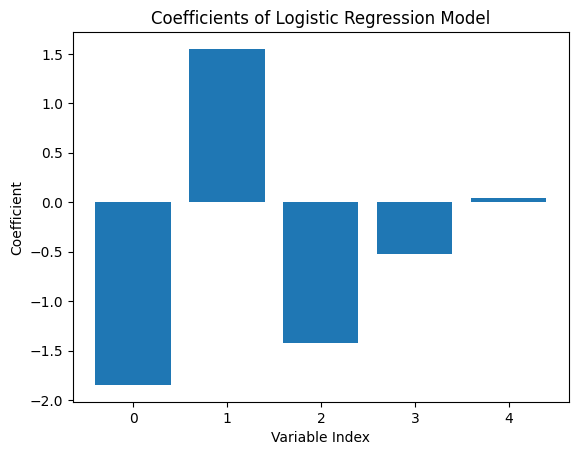

In [14]:
from sklearn.linear_model import LogisticRegression

# 假设Y是分类变量（1或0）
Y_binary = (Y > np.median(Y)).astype(int)  # 以中位数作为分类阈值

# 使用逻辑回归模型进行建模
logreg = LogisticRegression()
logreg.fit(X_sampled, Y_binary)

# 输出模型系数
print("模型系数:", logreg.coef_)

# 可视化模型系数
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xlabel('Variable Index')
plt.ylabel('Coefficient')
plt.title('Coefficients of Logistic Regression Model')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

使用选择的协变量估计的E(Y): 0.060301913671558564


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

使用所有协变量估计的E(Y): 0.0603019136715586


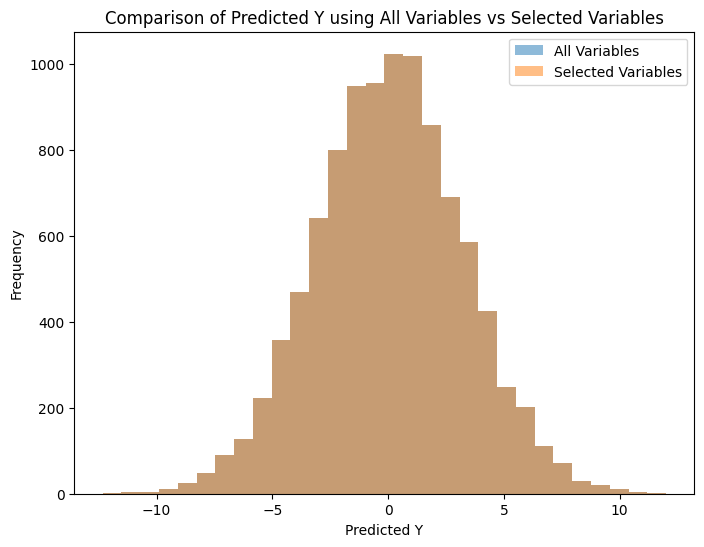

In [15]:
# 使用线性回归模型进行建模
linreg = LinearRegression()
linreg.fit(X_sampled, Y)

# 获取模型预测的响应变量
Y_pred = linreg.predict(X_sampled)

# 计算E(Y)的估计值
E_Y_estimate = np.mean(Y_pred)

print("使用选择的协变量估计的E(Y):", E_Y_estimate)

# 使用线性回归模型进行建模（使用所有协变量）
linreg_all = LinearRegression()
linreg_all.fit(X, Y)

# 获取模型预测的响应变量
Y_pred_all = linreg_all.predict(X)

# 计算E(Y)的估计值（使用所有协变量）
E_Y_estimate_all = np.mean(Y_pred_all)

print("使用所有协变量估计的E(Y):", E_Y_estimate_all)

# 可视化对比
plt.figure(figsize=(8, 6))
plt.hist(Y_pred_all, bins=30, alpha=0.5, label='All Variables')
plt.hist(Y_pred, bins=30, alpha=0.5, label='Selected Variables')
plt.xlabel('Predicted Y')
plt.ylabel('Frequency')
plt.title('Comparison of Predicted Y using All Variables vs Selected Variables')
plt.legend()
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression

# 假设Y是分类变量（1或0）
Y_binary = (Y > np.median(Y)).astype(int)  # 使用中位数作为分类阈值

# 使用逻辑回归模型进行建模
logreg = LogisticRegression()
logreg.fit(X_sampled, Y_binary)

# 输出模型系数
print("模型系数:", logreg.coef_)


<IPython.core.display.Javascript object>

模型系数: [[-1.84669972  1.54980861 -1.42053597 -0.524189    0.04197429]]


In [18]:
from sklearn.linear_model import LinearRegression

# 使用线性回归模型进行建模
linreg = LinearRegression()
linreg.fit(X_sampled, Y)

# 获取模型预测的响应变量
Y_pred = linreg.predict(X_sampled)

# 计算E(Y)的估计值
E_Y_estimate = np.mean(Y_pred)

print("E(Y)的估计值:", E_Y_estimate)


<IPython.core.display.Javascript object>

E(Y)的估计值: 0.060301913671558564


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 假设Y是分类变量（1或0）
Y_binary = (Y > np.median(Y)).astype(int)  # 使用中位数作为分类阈值

# 将数据划分为训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, test_size=0.2, random_state=42)

# 使用逻辑回归模型进行建模
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# 在测试集上进行预测
Y_pred = logreg.predict(X_test)

# 计算准确率
accuracy = np.mean(Y_pred == Y_test)
print("模型准确率:", accuracy)

# 抽样示例
selected_indices = np.random.choice(range(n), m, replace=False)
X_sampled = X[selected_indices]
Y_sampled = Y_binary[selected_indices]


模型准确率: 0.775


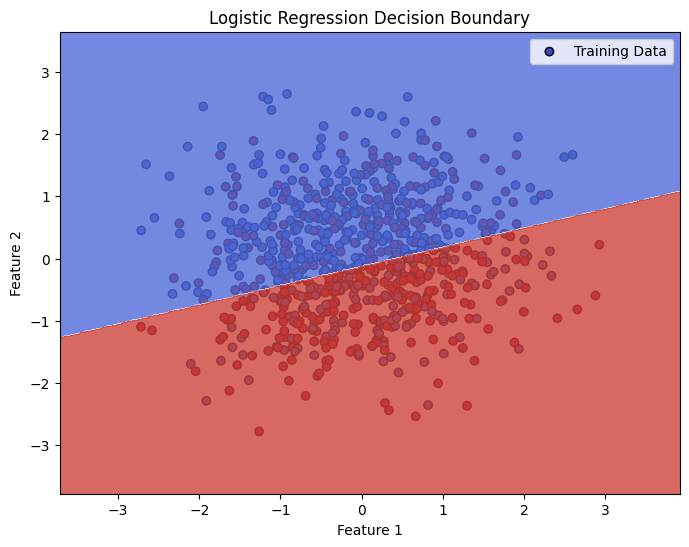

In [26]:
# 可视化模型的决策边界和训练集上的分类情况
plt.figure(figsize=(8, 6))

# 绘制训练集上的样本点
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='coolwarm', edgecolors='k', label='Training Data')

# 绘制决策边界
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


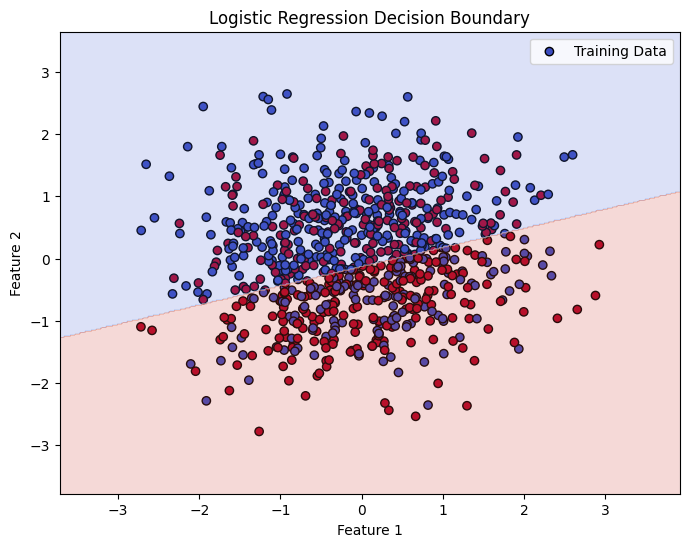

In [27]:
# 可视化模型的决策边界和训练集上的分类情况
plt.figure(figsize=(8, 6))

# 绘制训练集上的样本点
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='coolwarm', edgecolors='k', label='Training Data')

# 绘制决策边界
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')  # 调整背景色的透明度

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# 在测试集上进行预测
Y_pred_test = logreg.predict(X_test)

# 计算模型在测试集上的准确率
accuracy_test = np.mean(Y_pred_test == Y_test)
print("模型在测试集上的准确率:", accuracy_test)



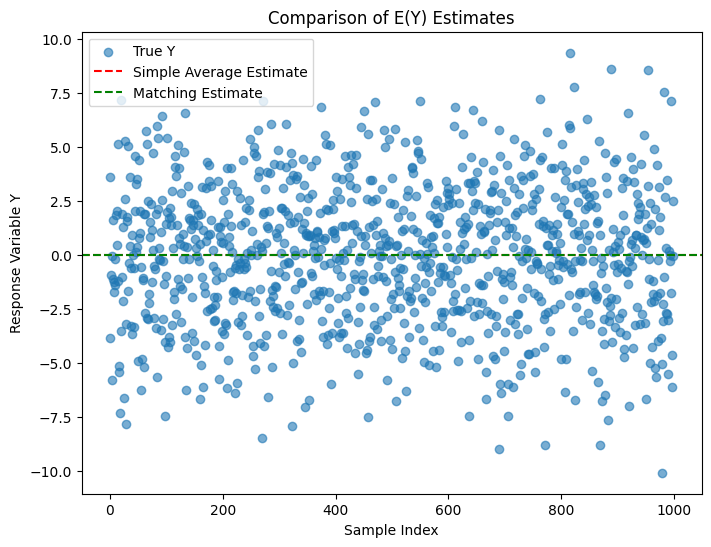

简单平均估计的均方误差: 10.142140037222918
倾向得分匹配估计的均方误差: 10.142140037222918


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成模拟数据
np.random.seed(0)
n = 1000  # 总样本数
p = 5  # 协变量的维度
m = 50  # 抽样的样本数

# 生成协变量
X = np.random.randn(n, p)

# 生成响应变量（线性模型）
b_true = np.random.randn(p)  # 真实的参数b
a = np.random.normal(scale=2, size=n)  # 随机误差项a
Y = X.dot(b_true) + a  # 响应变量

# 选择部分协变量进行抽样
selected_indices = np.random.choice(range(p), m, replace=True)  # 允许有放回地抽样
X_sampled = X[:, selected_indices]

# 简单平均估计
E_Y_estimate_simple = np.mean(Y)

# 倾向得分匹配估计
linreg = LinearRegression()
linreg.fit(X_sampled, Y)
Y_pred_matched = linreg.predict(X_sampled)
E_Y_estimate_matched = np.mean(Y_pred_matched)

# 计算均方误差
mse_simple = mean_squared_error(np.full_like(Y, E_Y_estimate_simple), Y)
mse_matched = mean_squared_error(np.full_like(Y, E_Y_estimate_matched), Y)

# 可视化对比
plt.figure(figsize=(8, 6))
plt.scatter(range(n), Y, label='True Y', alpha=0.6)
plt.axhline(y=E_Y_estimate_simple, color='r', linestyle='--', label='Simple Average Estimate')
plt.axhline(y=E_Y_estimate_matched, color='g', linestyle='--', label='Matching Estimate')
plt.xlabel('Sample Index')
plt.ylabel('Response Variable Y')
plt.title('Comparison of E(Y) Estimates')
plt.legend()
plt.show()

print("简单平均估计的均方误差:", mse_simple)
print("倾向得分匹配估计的均方误差:", mse_matched)


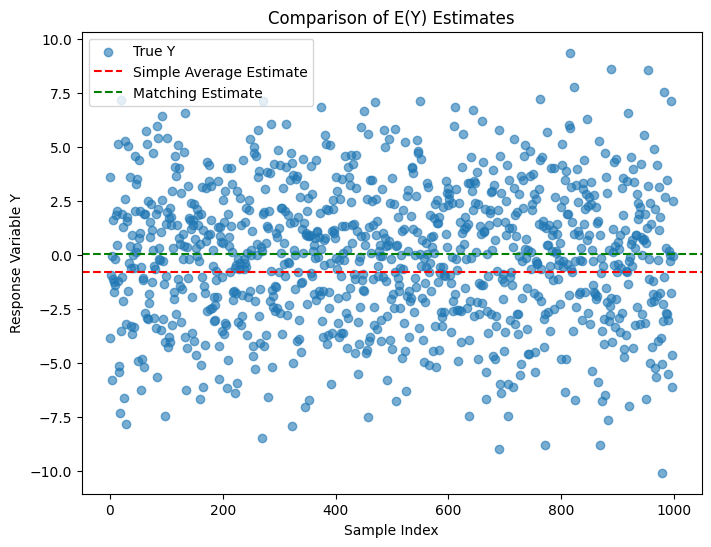

简单平均估计的均方误差: 10.911595484761255
倾向得分匹配估计的均方误差: 10.258287223047592


In [21]:
# 选择部分样本用于简单平均估计
selected_indices_simple = np.random.choice(range(n), m, replace=False)
X_simple = X[selected_indices_simple]
Y_simple = Y[selected_indices_simple]

# 使用剩余样本进行倾向得分匹配估计
remaining_indices = np.setdiff1d(range(n), selected_indices_simple)
X_remaining = X[remaining_indices]
Y_remaining = Y[remaining_indices]

# 倾向得分匹配估计
linreg_matched = LinearRegression()
linreg_matched.fit(X_remaining[:, selected_indices], Y_remaining)
Y_pred_matched = linreg_matched.predict(X_remaining[:, selected_indices])
E_Y_estimate_matched = np.mean(Y_pred_matched)

# 计算简单平均估计的均方误差
E_Y_estimate_simple = np.mean(Y_simple)
mse_simple = mean_squared_error(np.full_like(Y_remaining, E_Y_estimate_simple), Y_remaining)

# 计算倾向得分匹配估计的均方误差
mse_matched = mean_squared_error(np.full_like(Y_remaining, E_Y_estimate_matched), Y_remaining)

# 可视化对比
plt.figure(figsize=(8, 6))
plt.scatter(range(n), Y, label='True Y', alpha=0.6)
plt.axhline(y=E_Y_estimate_simple, color='r', linestyle='--', label='Simple Average Estimate')
plt.axhline(y=E_Y_estimate_matched, color='g', linestyle='--', label='Matching Estimate')
plt.xlabel('Sample Index')
plt.ylabel('Response Variable Y')
plt.title('Comparison of E(Y) Estimates')
plt.legend()
plt.show()

print("简单平均估计的均方误差:", mse_simple)
print("倾向得分匹配估计的均方误差:", mse_matched)
